# Assignment 1
For this assignment you'll be looking at 2017 data on immunizations from the CDC. Your datafile for this assignment is in [datasets/NISPUF17.csv](datasets/NISPUF17.csv). A data users guide for this, which you'll need to map the variables in the data to the questions being asked, is available at [datasets/NIS-PUF17-DUG.pdf](datasets/NIS-PUF17-DUG.pdf).

## Question 1 (20%)
Write a function called `proportion_of_education` which returns the proportion of children in the dataset who had a mother with the education levels equal to less than high school (<12), high school (12), more than high school but not a college graduate (>12) and college degree.

*This function should return a dictionary in the form of (use the correct numbers, do not round numbers):* 
```
    {"less than high school":0.2,
    "high school":0.4,
    "more than high school but not college":0.2,
    "college":0.2}
```

In [27]:
def proportion_of_education():
    import collections
    import pandas as pd
    df = pd.read_csv('datasets/NISPUF17.csv')
    EDUC1 = df[['EDUC1']]
    elem = EDUC1.groupby(["EDUC1"]).size()
    sum_elem = EDUC1.groupby(["EDUC1"]).size().sum()

    education_dict = {"less than high school":elem[1]/sum_elem,
                      "high school":elem[2]/sum_elem,
                    "more than high school but not college":elem[3]/sum_elem,
                    "college":elem[4]/sum_elem}
    return education_dict

In [28]:
assert type(proportion_of_education())==type({}), "You must return a dictionary."
assert len(proportion_of_education()) == 4, "You have not returned a dictionary with four items in it."
assert "less than high school" in proportion_of_education().keys(), "You have not returned a dictionary with the correct keys."
assert "high school" in proportion_of_education().keys(), "You have not returned a dictionary with the correct keys."
assert "more than high school but not college" in proportion_of_education().keys(), "You have not returned a dictionary with the correct keys."
assert "college" in proportion_of_education().keys(), "You have not returned a dictionary with the correct keys."

In [29]:
proportion_of_education()

{'less than high school': 0.10202002459160373,
 'high school': 0.172352011241876,
 'more than high school but not college': 0.24588090637625154,
 'college': 0.47974705779026877}

## Question 2 (20%)

Let's explore the relationship between being fed breastmilk as a child and getting a seasonal influenza vaccine from a healthcare provider. Return a tuple of the average number of influenza vaccines for those children we know received breastmilk as a child and those who know did not.

*This function should return a tuple in the form (use the correct numbers:*
```
(2.5, 0.1)
```

In [32]:
def average_influenza_doses():
    # your code goes here
    import pandas as pd
    df = pd.read_csv('datasets/NISPUF17.csv')
    new_df = df[['P_NUMFLU','CBF_01']].dropna().groupby('CBF_01').mean()
    
    tuple_influenza = (float(new_df.iloc[0]),float(new_df.iloc[1]))
    #print(tuple_influenza)
    return tuple_influenza

In [33]:
assert len(average_influenza_doses())==2, "Return two values in a tuple, the first for yes and the second for no."

In [34]:
average_influenza_doses()

(1.8799187420058687, 1.5963945918878317)

## Question 3 (25%)
It would be interesting to see if there is any evidence of a link between vaccine effectiveness and sex of the child. Calculate the ratio of the number of children who contracted chickenpox but were vaccinated against it (at least one varicella dose) versus those who were vaccinated but did not contract chicken pox. Return results by sex. 

*This function should return a dictionary in the form of (use the correct numbers):* 
```
    {"male":0.2,
    "female":0.4}
```

Note: To aid in verification, the `chickenpox_by_sex()['female']` value I'm looking for starts with the digits `0.00773`.

In [35]:
def chickenpox_by_sex():
    import pandas as pd
    df = pd.read_csv('datasets/NISPUF17.csv')
    df2 = df[["HAD_CPOX","SEX",'P_NUMVRC']].dropna() #drop not a number
    df3 = df2.loc[(df2["P_NUMVRC"] == 1)|(df2["P_NUMVRC"] == 2)]
    #df2[df2['P_NUMVRC'] != 0]  #remove the 0s
    df4 = df3.groupby(["HAD_CPOX","SEX"]).size().to_frame("count").reset_index() #convert series to df


    male_cpox =(df4.loc[(df4["SEX"] == 1)&(df4["HAD_CPOX"] == 1), ["count"]]).iloc[0].item() ##what is iloc and item
    male_no_cpox = (df4.loc[(df4["SEX"] == 1)&(df4["HAD_CPOX"] == 2), ["count"]]).iloc[0].item() 

    female_cpox = (df4.loc[(df4["SEX"] == 2)&(df4["HAD_CPOX"] == 1), ["count"]]).iloc[0].item() ##what is iloc and item
    female_no_cpox = (df4.loc[(df4["SEX"] == 2)&(df4["HAD_CPOX"] == 2), ["count"]]).iloc[0].item() 

    #print({'male':male_cpox/male_no_cpox,'female':female_cpox / female_no_cpox    })
    dict_cpox = {'male':male_cpox/male_no_cpox,'female':female_cpox / female_no_cpox    }
    return dict_cpox

In [36]:
assert len(chickenpox_by_sex())==2, "Return a dictionary with two items, the first for males and the second for females."

In [37]:
chickenpox_by_sex()

{'male': 0.009676960296001139, 'female': 0.0077918259335489565}

## Question 4 (25%)
A correlation is a statistical relationship between two variables. If we wanted to know if vaccines work, we might look at the correlation between the use of the vaccine and whether it results in prevention of the infection or disease [1]. In this question, you are to see if there is a correlation between having had the chicken pox and the number of chickenpox vaccine doses given (varicella).

Some notes on interpreting the answer. If the `had_chickenpox_column` is either `1` (for yes) or `2` for no, and that the `num_chickenpox_vaccine_column` is the number of doses a child has been given of the varicella vaccine, then a positive correlation (e.g. `corr > 0`) would mean that an increase in `had_chickenpox_column` (which means more no's) would mean an increase in the `num_chickenpox_vaccine_column` (which means more doses of vaccine). If `corr < 0` then there is a negative correlation, indicating that having had chickenpox is related to an increase in the number of vaccine doses. Also, `pval` refers to the probability the relationship observed is significant. In this case `pval` should be very very small (will end in `e-18` indicating a very small number), which means the result unlikely to be by chance.

[1] This isn't really the full picture, since we are not looking at when the dose was given. It's possible that children had chickenpox and then their parents went to get them the vaccine. Does this dataset have the data we would need to investigate the timing of the dose?

In [38]:
def corr_chickenpox():
    import scipy.stats as stats
    import numpy as np
    import pandas as pd
    df = pd.read_csv('datasets/NISPUF17.csv')
    
    df1 = df[["P_NUMVRC","HAD_CPOX"]].dropna()
    df2 = df1.loc[(df1["HAD_CPOX"] == 1)|(df["HAD_CPOX"] == 2)]
    df3 = df2.rename(columns= {"P_NUMVRC":"num_chickenpox_vaccine_column", "HAD_CPOX":"had_chickenpox_column"})
    corr, pval=stats.pearsonr(df3["had_chickenpox_column"],df3["num_chickenpox_vaccine_column"])
    return (corr)

In [39]:
assert -1<=corr_chickenpox()<=1, "You must return a float number between -1.0 and 1.0."

In [40]:
corr_chickenpox()

0.07044873460147985

## Question 5 (10%)

Is there a relationship between states which voted for the republican candidate for president in 2016 (Trump) versus those who voted for the democratic candidate for president in 2016 (Hillary) and the rate of vaccination in those states in 2017? I would like you to answer this by doing a correlation test between the ratio of votes for Trump/Clinton against the ratio of Vaccination/Non-Vaccination (of Chickenpox!) by state.

Note: You are certainly using joins or merges here.

Note: You will might need the state [FIPS identifiers](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code#FIPS_state_codes) and will certainly want the [MIT Elections Data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/42MVDX) which has the results from 2018.

Note: I don't know the answer to this question already.

In [41]:
%matplotlib inline
def corr_election():
    import scipy.stats as stats
    import numpy as np
    import pandas as pd
    df_president = pd.read_csv("https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/42MVDX/MFU99O",sep  = "\t")
    df_vaccine = pd.read_csv('datasets/NISPUF17.csv')
    
    df_president = df_president[['state_fips','candidate','candidatevotes','party','writein']].dropna().loc[df_president['year'] == 2016] #get useful columns and year 2016
    trump_votes = df_president.loc[(df_president['candidate'] == 'Trump, Donald J.')& ~(df_president["writein"])].loc[df_president['party'] == 'republican'] #Get trump, clean up party column and writein column
    clinton_votes = df_president.loc[(df_president['candidate'] == 'Clinton, Hillary')& ~(df_president["writein"])].loc[df_president['party'] == 'democrat'] #likewise
    trump_clinton_votes = pd.merge(trump_votes, clinton_votes, on = "state_fips") #merge
    trump_clinton_votes['ratio'] = (trump_clinton_votes['candidatevotes_x'])/trump_clinton_votes['candidatevotes_y'] #ratio
    
    df_vaccine = df_vaccine[["STATE","P_NUMVRC"]]#get two useful columns
    df_no_vaccine = df_vaccine [df_vaccine['P_NUMVRC'] == 0].groupby(["STATE"]).size().to_frame("count").reset_index().rename(columns= {"STATE":"state", "count":"no_vaccine"}) #get no vaccine data
    df_yes_vaccine = df_vaccine [df_vaccine['P_NUMVRC'] >= 1].groupby(["STATE"]).size().to_frame("count").reset_index().rename(columns= {"STATE":"state", "count":"yes_vaccine"}) #get yes vaccine data
    merge_vaccine = pd.merge(df_no_vaccine,df_yes_vaccine , on = "state") #merge
    ratio_vaccine = merge_vaccine['yes_vaccine']/(( merge_vaccine['no_vaccine'])+(merge_vaccine['yes_vaccine']))
    corr, pval=stats.pearsonr(trump_clinton_votes['ratio'],ratio_vaccine)
    
    df=pd.DataFrame({"ratio of trump/clinton":trump_clinton_votes['ratio'], #plot dataframe
                     "ratio of vaccinated/non":ratio_vaccine})
    df.plot() #plots a fancy graph   
    # just return the correlation at the end
    return corr, pval

(-0.2601154923758659, 0.06526807297710618)

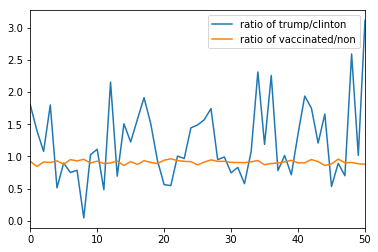

In [42]:
corr_election()